# Simulating Geometric Brownian Motion (GBM) in Python

<b> YouTube Tutorial </b> (Published:
Sep 15, 2021): https://youtu.be/jejjUPfaIXY

In this tutorial we will be simulating Geometric Brownian Motion in Python.

Geometric Brownian motion (GBM) S is defined by S0 > 0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):


$\Large dS_t = \mu S_t dt + \sigma S_t dW_t$

Integrated Form:

 - $\log S_t = \log S_0 + \int_{0}^{t} (\mu-\frac{\sigma^2}{2}) \,ds + \int_{0}^{t} \sigma \,dW_s $

 - $\log S_t = \log S_0 + (\mu-\frac{\sigma^2}{2})t + \sigma W_t $

 - $\log S_t \sim N(\log S_0 + (\mu-\frac{\sigma^2}{2})t, \sigma^2 t)$

Explicit Expression:

$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parameters

In [84]:
# drift coefficent
mu = -0.2
# volatility
sigma = 1
# number of steps
n = 63
# time in years
T = 0.25
# number of sims
M = 1000
# initial stock price
S0 = 1


### Simulating GBM Paths

We have two options here, we can either:
- (like here) simulate the stock price directly throughout the simulation and multiple the exponential terms together at each time step; or
- we can simulate the log normal distribution and cumulatively add the terms along each sample path


$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

In [85]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

### Consider time intervals in years

In [86]:
St

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.91299317, 0.93682921, 1.00692698, ..., 0.9598969 , 1.06115107,
        1.01973676],
       [0.93413635, 0.84594582, 1.14649074, ..., 0.96646724, 1.12912722,
        1.10475852],
       ...,
       [0.42722148, 0.78662791, 0.80203268, ..., 0.69252648, 1.50603809,
        0.73359206],
       [0.51467456, 0.74245436, 0.70447246, ..., 0.64951577, 1.4883975 ,
        0.63847223],
       [0.50556166, 0.78120066, 0.63229461, ..., 0.62781126, 1.50614006,
        0.7026868 ]])

In [ ]:
#quintiles

In [ ]:
#quintiles = pd.qcut(St[-1], q=20, labels=False) + 1

# Print results
#for value, group in zip(St[-1], quintiles):
#    print(f"Value: {value}, Quintile: {group}")

In [87]:
# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

### Plotting Results

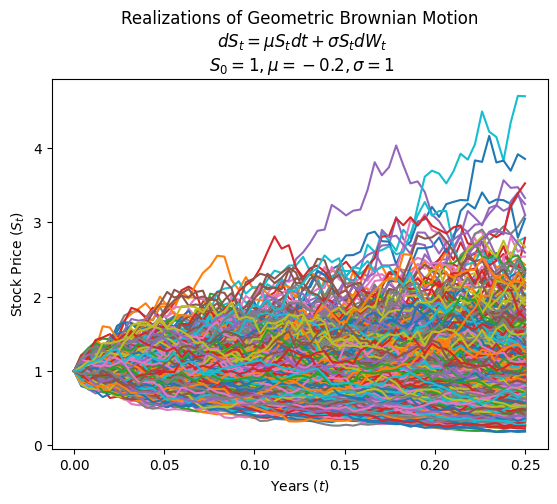

In [88]:
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

In [ ]:
# drift coefficent
mu = -0.00039472081367866
# volatility
sigma = 0.012489686810939284
# number of steps
n = 251
# time in years
T = 0.25
# number of sims
M = 1000
# initial stock price
S0 = 1
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

In [211]:
import pandas_datareader.data as web
import numpy as np
import random
import warnings
import pandas as pd
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02, start=1):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps-1) ]
    steps.insert(0,0)
    y = start*np.exp(np.cumsum(steps))
    return y

df = web.DataReader('^SPX', 'stooq')
mask = ( '2020-01-01' <= df.index ) & ( df.index <= '2020-12-31' )
df = df[mask]
prices = np.flip(df['Close'].values)

logprices = np.log(prices)
logreturns = logprices[1:] - logprices[:-1]
mu = np.mean(logreturns)
sigma = np.std(logreturns)
nsteps = logprices.shape[0]

t = 1
x = [ t*i for i in range(nsteps) ]
y_list = []
for i in list(range(0,1000000)):
    y = simulate_1d_gbm(nsteps=nsteps, mu=mu, sigma=sigma, start=prices[0])
    y_list.append(y[-1])

exp_price = np.mean(y_list)
print(f'Expected end price: {exp_price}')

Expected end price: 3755.853205639312


In [212]:
df 

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,3733.27,3760.20,3726.88,3756.07,1.658919e+09
2020-12-30,3736.19,3744.63,3730.21,3732.04,1.559328e+09
2020-12-29,3750.01,3756.12,3723.31,3727.04,1.638287e+09
2020-12-28,3723.03,3740.51,3723.03,3735.36,1.662610e+09
2020-12-24,3694.03,3703.82,3689.32,3703.06,8.187849e+08
...,...,...,...,...,...
2020-05-15,2829.95,2865.01,2816.78,2863.70,3.291068e+09
2020-05-14,2794.54,2852.80,2766.64,2852.50,3.342014e+09
2020-05-13,2865.86,2874.14,2793.15,2820.00,3.538682e+09
